In [21]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')



In [22]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD (1).csv


In [23]:
import io
df = pd.read_csv("ETH-USD.csv", index_col=0, parse_dates=True)
df.shape
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-01-01,1196.713623,1203.475342,1192.885376,1200.964844,1200.964844,2399674550
2023-01-02,1201.103271,1219.860596,1195.214966,1214.656616,1214.656616,3765758498
2023-01-03,1214.744019,1219.095337,1207.491577,1214.778809,1214.778809,3392972131


Text(0, 0.5, 'ETH-USD Açılış Fiyatları')

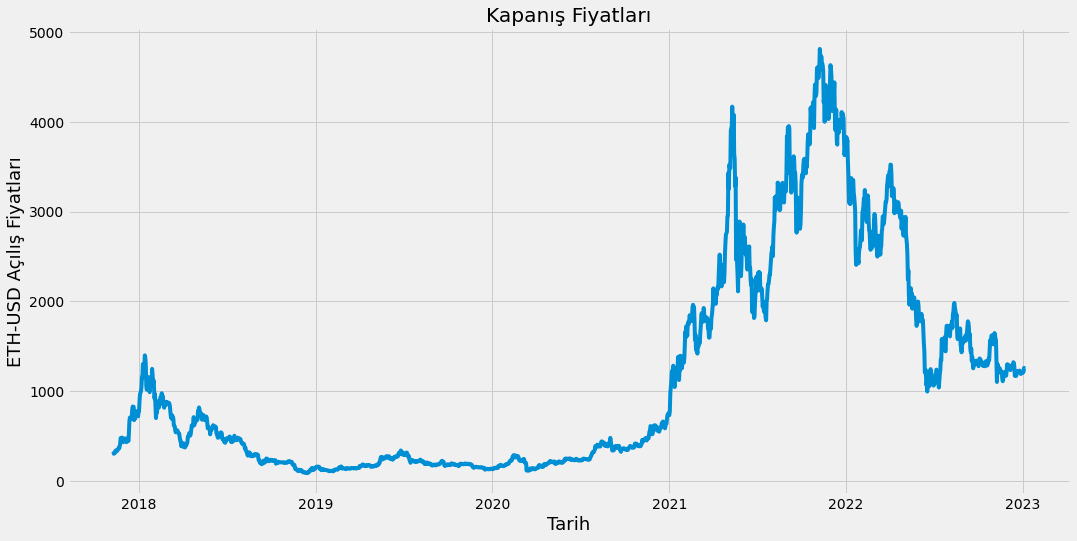

In [24]:
plt.figure(figsize=(16,8))
plt.title("Kapanış Fiyatları")
plt.plot(df['Close'])
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('ETH-USD Açılış Fiyatları', fontsize=18)


In [25]:
data= df.filter(['Close'])
dataset= data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1508

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0500395 ],
       [0.0454642 ],
       [0.04872747],
       ...,
       [0.23911238],
       [0.2479427 ],
       [0.24667433]])

In [27]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05839797, 0.06268138, 0.06892405,
       0.08261865, 0.08079221, 0.0818612 , 0.08377014, 0.08219371,
       0.07259534, 0.07673914, 0.08084805, 0.08019425, 0.08070273,
       0.08162304, 0.08015872, 0.0728206 , 0.07405162, 0.07862523,
       0.08232062, 0.07559844, 0.09112687, 0.11995542, 0.1308138 ,
       0.12934354, 0.12693903, 0.12942667, 0.13445355, 0.15024744,
       0.15705359, 0.1554171 , 0.15583526, 0.12491102, 0.13432919,
       0.12899074, 0.14415345, 0.14584601, 0.1435206 , 0.13805948,
       0.14156408, 0.13387866, 0.14222845, 0.14559324, 0.16924134,
       0.18579795, 0.18964797, 0.19320101, 0.20249926, 0.22608115])]
[0.22509971577339596]

[array([0.0500395 , 0.0454642 , 0.04872747, 0.04729487, 0.0491579 ,
       0.05358176, 0.05267774, 0.05216312, 0.05247405, 0.05569289,
       0.0571257 , 0.05973666, 0.05

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(1448, 60, 1)


In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [32]:
model.fit(x_train,y_train, batch_size=1,epochs=5)

Epoch 1/5
1448/1448 [==============================] - 43s 27ms/step - loss: 0.0024
Epoch 2/5
1448/1448 [==============================] - 38s 26ms/step - loss: 0.0012
Epoch 3/5
1448/1448 [==============================] - 38s 26ms/step - loss: 8.2619e-04
Epoch 4/5
1448/1448 [==============================] - 40s 28ms/step - loss: 8.2973e-04
Epoch 5/5
1448/1448 [==============================] - 39s 27ms/step - loss: 7.2760e-04


In [33]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for y in range(60,len(test_data)):
  x_test.append(test_data[y-60:y,0])
  

In [34]:
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 16ms/step


In [37]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

18.419368798994352

<ipython-input-38-87bcbd9c370a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tahminler'] = predictions


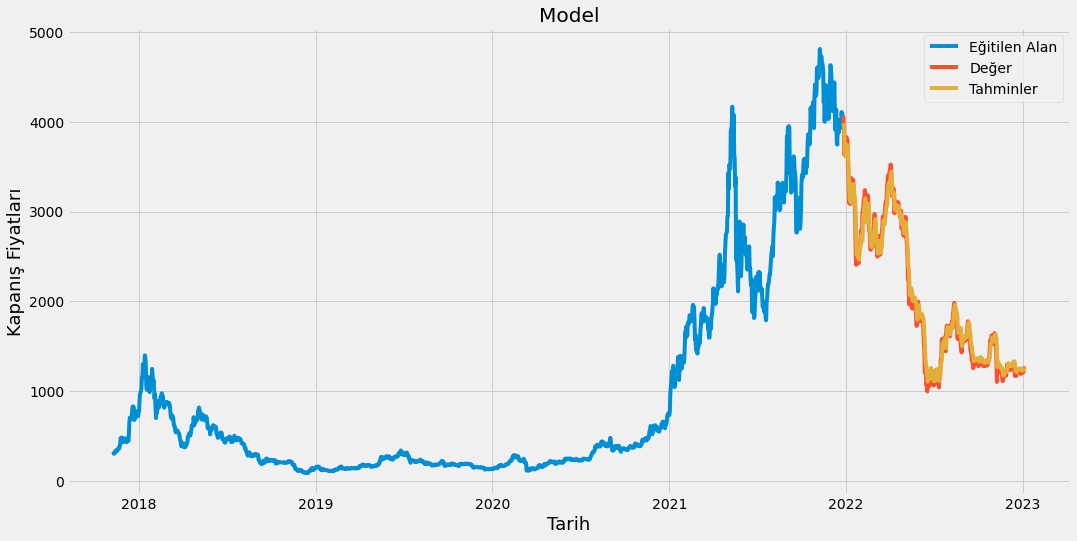

                  Close    Tahminler
Date                                
2021-12-26  4067.328125  3984.659180
2021-12-27  4037.547607  3971.646240
2021-12-28  3800.893066  3946.945068
2021-12-29  3628.531738  3776.635498
2021-12-30  3713.852051  3618.253662
...                 ...          ...
2023-01-01  1200.964844  1228.429688
2023-01-02  1214.656616  1229.903931
2023-01-03  1214.778809  1238.148071
2023-01-04  1256.526611  1241.782959
2023-01-05  1250.530029  1266.012939

[376 rows x 2 columns]


In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Tahminler'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Tarih',fontsize=18)
plt.ylabel('Kapanış Fiyatları',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Tahminler']])
plt.legend(['Eğitilen Alan','Değer','Tahminler'])
plt.show()
print(valid)